# Scrape News Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
NewsList = []

In [ ]:
for i in range(0, 150):
  url=f'https://search.hkej.com/template/fulltextsearch/php/search.php?q=%E6%B8%AF%E8%82%A1&page={i}#top'

  header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

  response = requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, "html.parser")
  element = soup.find_all('div', class_='result')
  for i in element:
    try:
      title = str(i.find('h3'))
      #print(title.getText())
      title_clean = BeautifulSoup(title, "lxml").text
    except TypeError:
      title = 'None'
      title_clean = 'None'
    try:
      image = i.find('img')
      img = image['src']
    except TypeError:
      image = 'None'
      img = 'None'
    try:
      desc = str(i.find('p', class_='recap'))
      #desc =
      desc_clean = BeautifulSoup(desc, "lxml").text
    except TypeError:
      desc = 'None'
      desc_clean = 'None'
    try:
      time = str(i.find('span', class_='timeStamp'))
      #dateTime = time['datetime']
    except TypeError:
      time = 'None'
      #dateTime = 'None'
    NewsList.append((title_clean, img, desc_clean, time))

In [ ]:
NewsList

[('【EJFQ信析】美元霸權漸失勢 配置勿缺新興市',
  '//static.hkej.com/hkej/images/2023/04/15/3426699_30eb153b8200dd43ef2014d92f2b17ec_100.jpg',
  '港股復活節長假期後未有突破，恒指周五收報20438點，4月上半月僅微升39點，波幅只有865點(4.24%)， ...全文',
  '<span class="timeStamp">2023年04月15日</span>'),
 ('【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭',
  'None',
  '...\xa0焦點簡訊\n￭ ADR港股比例指數收報20341，較港低97點。阿里巴巴(09988)、美團(03690)、小米 ...全文',
  '<span class="timeStamp">2023年04月15日</span>'),
 ('【欲言不止】以槓桿ETF捕捉美股升勢',
  '//static.hkej.com/hkej/images/2023/04/15/3425796_4f561369062c27e0fc6056c7f14eb133_100.jpg',
  '...\xa0基本上原地踏步，因此港股也許還未脫離谷底。但是美股卻已經偷步炒起，科技為主的納斯特指數也上升了約兩成。有一對E ...全文',
  '<span class="timeStamp">2023年04月15日</span>'),
 ('恒指夜期收報20324 低水115點',
  'None',
  '...\xa0市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文',
  '<span class="timeStamp">2023年04月15日</span>'),
 ('如何尋回投資的節奏感',
  '//static.hkej.com/hkej/images/2023/04/15/3426332_87bc72e561a5eba516a9e952163335c2_100.jpg',
  '剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細分析每一間關注公司的財務報表，然後再參 ...全文',
  '<span class="timeStamp">2023年04月15日</span>'),


In [ ]:
df = pd.DataFrame(NewsList, columns=('title', 'image', 'description', 'time'))

In [ ]:
df

,title,image,description,time
0,【EJFQ信析】美元霸權漸失勢 配置勿缺新興市,//static.hkej.com/hkej/images/2023/04/15/34266...,港股復活節長假期後未有突破，恒指周五收報20438點，4月上半月僅微升39點，波幅只有865...,"<span class=""timeStamp"">2023年04月15日</span>"
1,【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭,None,... 焦點簡訊\n￭ ADR港股比例指數收報20341，較港低97點。阿里巴巴(09988...,"<span class=""timeStamp"">2023年04月15日</span>"
2,【欲言不止】以槓桿ETF捕捉美股升勢,//static.hkej.com/hkej/images/2023/04/15/34257...,... 基本上原地踏步，因此港股也許還未脫離谷底。但是美股卻已經偷步炒起，科技為主的納斯特指...,"<span class=""timeStamp"">2023年04月15日</span>"
3,恒指夜期收報20324 低水115點,None,... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,"<span class=""timeStamp"">2023年04月15日</span>"
4,如何尋回投資的節奏感,//static.hkej.com/hkej/images/2023/04/15/34263...,剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細分析每一間關注公司的...,"<span class=""timeStamp"">2023年04月15日</span>"
...,...,...,...,...
2995,自稱TVB小股東促管理層交代7大過失,None,自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列舉電視廣播(00511)(TVB)過...,"<span class=""timeStamp"">2023年01月30日</span>"
2996,恒指曾挫354點 公用收息股跑出,//static.hkej.com/hkej/images/2023/01/30/33586...,今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300點。\n恒指低開109點或0.4...,"<span class=""timeStamp"">2023年01月30日</span>"
2997,【異動股】中資電訊股逆市升 聯通中電信創52周高,//static.hkej.com/hkej/images/2023/01/30/33585...,中資電訊股今早逆市造好，中電信(00728)表現最好，曾升6.9%，高見4.02元，創52周...,"<span class=""timeStamp"">2023年01月30日</span>"
2998,【異動板塊】懶理黃金周入境客增 濠賭股全線跌,//static.hkej.com/hkej/images/2023/01/30/33586...,澳門旅遊局公布，內地春節黃金周7天假期期間，由1月21日至27日(年三十到大年初六)，共有4...,"<span class=""timeStamp"">2023年01月30日</span>"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3000 non-null   object
 1   image        3000 non-null   object
 2   description  3000 non-null   object
 3   time         3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


In [ ]:
#df[['mark', 'title']] = df['title'].str.split('">', expand = True)
#df[['title', 'mark2']] = df['title'].str.split('</a>', expand = True)
#del df['mark']
#del df['mark2']

In [ ]:
#df[['mark','description']] = df['description'].str.split('"recap">', expand = True)

In [ ]:
df['image'] = df['image'].replace('_100','',regex = True)

In [ ]:
df

,title,image,description,time
0,【EJFQ信析】美元霸權漸失勢 配置勿缺新興市,//static.hkej.com/hkej/images/2023/04/15/34266...,港股復活節長假期後未有突破，恒指周五收報20438點，4月上半月僅微升39點，波幅只有865...,"<span class=""timeStamp"">2023年04月15日</span>"
1,【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭,None,... 焦點簡訊\n￭ ADR港股比例指數收報20341，較港低97點。阿里巴巴(09988...,"<span class=""timeStamp"">2023年04月15日</span>"
2,【欲言不止】以槓桿ETF捕捉美股升勢,//static.hkej.com/hkej/images/2023/04/15/34257...,... 基本上原地踏步，因此港股也許還未脫離谷底。但是美股卻已經偷步炒起，科技為主的納斯特指...,"<span class=""timeStamp"">2023年04月15日</span>"
3,恒指夜期收報20324 低水115點,None,... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,"<span class=""timeStamp"">2023年04月15日</span>"
4,如何尋回投資的節奏感,//static.hkej.com/hkej/images/2023/04/15/34263...,剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細分析每一間關注公司的...,"<span class=""timeStamp"">2023年04月15日</span>"
...,...,...,...,...
2995,自稱TVB小股東促管理層交代7大過失,None,自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列舉電視廣播(00511)(TVB)過...,"<span class=""timeStamp"">2023年01月30日</span>"
2996,恒指曾挫354點 公用收息股跑出,//static.hkej.com/hkej/images/2023/01/30/33586...,今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300點。\n恒指低開109點或0.4...,"<span class=""timeStamp"">2023年01月30日</span>"
2997,【異動股】中資電訊股逆市升 聯通中電信創52周高,//static.hkej.com/hkej/images/2023/01/30/33585...,中資電訊股今早逆市造好，中電信(00728)表現最好，曾升6.9%，高見4.02元，創52周...,"<span class=""timeStamp"">2023年01月30日</span>"
2998,【異動板塊】懶理黃金周入境客增 濠賭股全線跌,//static.hkej.com/hkej/images/2023/01/30/33586...,澳門旅遊局公布，內地春節黃金周7天假期期間，由1月21日至27日(年三十到大年初六)，共有4...,"<span class=""timeStamp"">2023年01月30日</span>"


In [ ]:
df['title&desc'] = df['title'] + df['description']

In [ ]:
df.to_csv('ganggu.csv')

# Sentiment Analysis

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification , AutoTokenizer, pipeline
import torch
class Chinese_Emotion(torch.nn.Module):
  def __init__(self):
    super().__init__()
    model_name = "liam168/c2-roberta-base-finetuned-dianping-chinese"
    class_num = 2
    ts_texts = ["我喜欢下雨。", "我讨厌他."]
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=class_num)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    self.classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
  def forward(self,input_text):
    result=self.classifier(input_text)

    return result

In [ ]:
Chinese_model = Chinese_Emotion()

In [ ]:
file_name = "/content/ganggu.csv"
text_column = "title&desc"

df_pred = pd.read_csv(file_name)
pred_texts = df_pred[text_column].dropna().astype('str').tolist()

In [ ]:
pred_result = Chinese_model(pred_texts)

In [ ]:
pred_result

[{'label': 'negative', 'score': 0.9929748773574829},
 {'label': 'positive', 'score': 0.9834543466567993},
 {'label': 'negative', 'score': 0.9941226840019226},
 {'label': 'negative', 'score': 0.9939927458763123},
 {'label': 'positive', 'score': 0.968718945980072},
 {'label': 'positive', 'score': 0.9233169555664062},
 {'label': 'negative', 'score': 0.99408358335495},
 {'label': 'positive', 'score': 0.9894385933876038},
 {'label': 'negative', 'score': 0.9543054103851318},
 {'label': 'negative', 'score': 0.9928823709487915},
 {'label': 'negative', 'score': 0.9938381314277649},
 {'label': 'positive', 'score': 0.9857359528541565},
 {'label': 'negative', 'score': 0.9934711456298828},
 {'label': 'negative', 'score': 0.9917548894882202},
 {'label': 'positive', 'score': 0.9864398837089539},
 {'label': 'positive', 'score': 0.9359045624732971},
 {'label': 'negative', 'score': 0.9937857389450073},
 {'label': 'negative', 'score': 0.9913687109947205},
 {'label': 'negative', 'score': 0.993742883205413

In [ ]:
store_list=[]
store_score=[]
store_mark=[]
for i in range(len(pred_result)):
  store_list.append(pred_result[i]['label'])
  if pred_result[i]['label'] == 'positive':
    store_mark.append(2)
  if pred_result[i]['label'] == 'negative':
    store_mark.append(0)
  store_score.append(pred_result[i]['score'])
store_list

['negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',

In [ ]:
df_title_sentiment = pd.DataFrame(list(zip(store_list,store_score,store_mark)), columns=['label','score','mark'])
df_title_sentiment

,label,score,mark
0,negative,0.992975,0
1,positive,0.983454,2
2,negative,0.994123,0
3,negative,0.993993,0
4,positive,0.968719,2
...,...,...,...
2995,negative,0.994129,0
2996,negative,0.993793,0
2997,negative,0.977230,0
2998,negative,0.994138,0


In [ ]:
df['text_score'] = df_title_sentiment['mark'].values

In [ ]:
df

,title,image,description,time,title&desc,text_score
0,【EJFQ信析】美元霸權漸失勢 配置勿缺新興市,//static.hkej.com/hkej/images/2023/04/15/34266...,港股復活節長假期後未有突破，恒指周五收報20438點，4月上半月僅微升39點，波幅只有865...,"<span class=""timeStamp"">2023年04月15日</span>",【EJFQ信析】美元霸權漸失勢 配置勿缺新興市港股復活節長假期後未有突破，恒指周五收報204...,0
1,【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭,None,... 焦點簡訊\n￭ ADR港股比例指數收報20341，較港低97點。阿里巴巴(09988...,"<span class=""timeStamp"">2023年04月15日</span>",【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭... 焦點簡訊\n￭ ADR港股...,2
2,【欲言不止】以槓桿ETF捕捉美股升勢,//static.hkej.com/hkej/images/2023/04/15/34257...,... 基本上原地踏步，因此港股也許還未脫離谷底。但是美股卻已經偷步炒起，科技為主的納斯特指...,"<span class=""timeStamp"">2023年04月15日</span>",【欲言不止】以槓桿ETF捕捉美股升勢... 基本上原地踏步，因此港股也許還未脫離谷底。但是美...,0
3,恒指夜期收報20324 低水115點,None,... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,"<span class=""timeStamp"">2023年04月15日</span>",恒指夜期收報20324 低水115點... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,0
4,如何尋回投資的節奏感,//static.hkej.com/hkej/images/2023/04/15/34263...,剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細分析每一間關注公司的...,"<span class=""timeStamp"">2023年04月15日</span>",如何尋回投資的節奏感剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細...,2
...,...,...,...,...,...,...
2995,自稱TVB小股東促管理層交代7大過失,None,自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列舉電視廣播(00511)(TVB)過...,"<span class=""timeStamp"">2023年01月30日</span>",自稱TVB小股東促管理層交代7大過失自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列...,0
2996,恒指曾挫354點 公用收息股跑出,//static.hkej.com/hkej/images/2023/01/30/33586...,今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300點。\n恒指低開109點或0.4...,"<span class=""timeStamp"">2023年01月30日</span>",恒指曾挫354點 公用收息股跑出今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300...,0
2997,【異動股】中資電訊股逆市升 聯通中電信創52周高,//static.hkej.com/hkej/images/2023/01/30/33585...,中資電訊股今早逆市造好，中電信(00728)表現最好，曾升6.9%，高見4.02元，創52周...,"<span class=""timeStamp"">2023年01月30日</span>",【異動股】中資電訊股逆市升 聯通中電信創52周高中資電訊股今早逆市造好，中電信(00728)...,0
2998,【異動板塊】懶理黃金周入境客增 濠賭股全線跌,//static.hkej.com/hkej/images/2023/01/30/33586...,澳門旅遊局公布，內地春節黃金周7天假期期間，由1月21日至27日(年三十到大年初六)，共有4...,"<span class=""timeStamp"">2023年01月30日</span>",【異動板塊】懶理黃金周入境客增 濠賭股全線跌澳門旅遊局公布，內地春節黃金周7天假期期間，由1...,0


In [ ]:
df.to_csv('/content/ganggu_sentiment.csv')

# Download Images from Website

In [ ]:
for index, link in enumerate(df['image']):
  with open(f'/content/ganggu/{index}.png', 'wb') as f:
    if df['image'][index] != 'None':
      header = {'cookie': '_ga=GA1.1.343496321.1679631346; wooTracker=8IKLMnNJKO2w; __gads=ID=1d4b27870faef1bf:T=1679631346:S=ALNI_MboBQva7Cc2QNaNjfkSWUn1um3fKA; ejUID=7a6ce1f6-972f-7e81-18e3-6af6685d9d1d; __utma=231706246.343496321.1679631346.1679633351.1679633351.1; __utmz=231706246.1679633351.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); PHPSESSID=43mqo7rudk7l7oiijbgt2c4fnk; __gpi=UID=00000bdf86d6d3f5:T=1679631346:RT=1680785822:S=ALNI_MZieo5WB3ShHYRbezgLj8nL4Kxr7Q; _ga_7353J2WJ9W=GS1.1.1680797553.5.1.1680801484.0.0.0',
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
      r = requests.get('https:'+link, headers = header).content
      f.write(r)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3000 non-null   object
 1   image        3000 non-null   object
 2   description  3000 non-null   object
 3   time         3000 non-null   object
 4   title&desc   3000 non-null   object
 5   text_score   3000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 140.8+ KB


In [ ]:
!zip -r ganggu.zip /content/ganggu

updating: content/ganggu/ (stored 0%)
updating: content/ganggu/941.png (deflated 3%)
updating: content/ganggu/317.png (deflated 2%)
updating: content/ganggu/1279.png (deflated 1%)
updating: content/ganggu/67.png (stored 0%)
updating: content/ganggu/1795.png (stored 0%)
updating: content/ganggu/2087.png (deflated 3%)
updating: content/ganggu/1470.png (deflated 3%)
updating: content/ganggu/1797.png (stored 0%)
updating: content/ganggu/1528.png (deflated 3%)
updating: content/ganggu/1440.png (stored 0%)
updating: content/ganggu/2632.png (deflated 1%)
updating: content/ganggu/1060.png (deflated 2%)
updating: content/ganggu/2111.png (deflated 3%)
updating: content/ganggu/2840.png (deflated 3%)
updating: content/ganggu/2913.png (deflated 3%)
updating: content/ganggu/1565.png (deflated 3%)
updating: content/ganggu/845.png (deflated 3%)
updating: content/ganggu/2034.png (stored 0%)
updating: content/ganggu/978.png (deflated 3%)
updating: content/ganggu/814.png (deflated 3%)
updating: content/g

In [ ]:
from google.colab import files
files.download('/content/ganggu.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Face Emotion Detection


In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=4e418b880970797581b8486446e98c172b022f252db6ee662fd123716ce86724
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
!pip install fer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.0 MB/s eta 0:00:00


In [ ]:
from fer import FER
import cv2

In [ ]:
emotion_detector = FER(mtcnn=True)

In [ ]:
from collections import Counter
def get_emotion_from_image(image_path):
  try:
    test_img = cv2.imread(image_path)
    analysis = emotion_detector.detect_emotions(test_img)
    emotion_store=[]
    emotion_score_all=0
    print(analysis)
    for index in range(len(analysis)):
      emotion_this=analysis[index]['emotions']
      emotion_name=max(emotion_this , key=emotion_this.get)
      if emotion_name in ["angry","digust","fear","sad"]:
        emotion_classify="negative"
        emotion_score=-1
        emotion_score_all+=emotion_score
      elif emotion_name in ["happy"]:
        emotion_classify="positive"
        emotion_score=2
        emotion_score_all+=emotion_score
      elif emotion_name in ["neutral","surprise"]:
        emotion_classify="neutral"
        emotion_score=1
        emotion_score_all+=emotion_score
      emotion_store.append(emotion_classify)
    emotion_statistics=Counter(emotion_store)
    emotion_most=emotion_statistics.most_common(1)[0][0]
    
    return emotion_most, emotion_store, emotion_score_all
  except:
    pass
    return 'No face detected', 'No face detected', 0

In [ ]:
from collections import Counter
def get_emotion_from_image(image_path):
  try:
    test_img = cv2.imread(image_path)
    analysis = emotion_detector.detect_emotions(test_img)
    emotion_store=[]
    for index in range(len(analysis)):
      emotion_this=analysis[index]['emotions']
      emotion_name=max(emotion_this , key=emotion_this.get)
      emotion_store.append(emotion_name)
    emotion_statistics=Counter(emotion_store)
    emotion_most=emotion_statistics.most_common(1)[0][0]
    return emotion_most, emotion_store
  except:
    print('No face detected!')
    pass
    return 'No face detected', 'No face detected'

In [ ]:
emotionList = []
emotionOther = []
emotionScore = []
for i in range(len(df)):
  try:
    emotion_result, emotion_other, emotion_score = get_emotion_from_image(f"/content/ganggu/{i}.png")
  except Error:
    emotion_result = 'None'
  emotionList.append(emotion_result)
  emotionOther.append(emotion_other)
  emotionScore.append(emotion_score)

[{'box': [538, 203, 55, 73], 'emotions': {'angry': 0.05, 'disgust': 0.0, 'fear': 0.03, 'happy': 0.03, 'sad': 0.68, 'surprise': 0.0, 'neutral': 0.2}}]
[]
[{'box': [421, 70, 137, 177], 'emotions': {'angry': 0.03, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.86, 'sad': 0.03, 'surprise': 0.0, 'neutral': 0.07}}]
[]
[]
[]
[]
[{'box': [538, 203, 55, 73], 'emotions': {'angry': 0.05, 'disgust': 0.0, 'fear': 0.03, 'happy': 0.03, 'sad': 0.68, 'surprise': 0.0, 'neutral': 0.2}}]
[]
[]
[]
[{'box': [117, 64, 109, 132], 'emotions': {'angry': 0.34, 'disgust': 0.0, 'fear': 0.16, 'happy': 0.08, 'sad': 0.28, 'surprise': 0.0, 'neutral': 0.14}}]
[{'box': [538, 203, 55, 73], 'emotions': {'angry': 0.05, 'disgust': 0.0, 'fear': 0.03, 'happy': 0.03, 'sad': 0.68, 'surprise': 0.0, 'neutral': 0.2}}]
[]
[{'box': [421, 70, 137, 177], 'emotions': {'angry': 0.03, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.86, 'sad': 0.03, 'surprise': 0.0, 'neutral': 0.07}}]
[]
[]
[]
[]
[{'box': [538, 203, 55, 73], 'emotions': {'angry': 0.05

In [ ]:
df['emotion_face'] = emotionList

In [ ]:
df['emotion_all'] = emotionOther

In [ ]:
df['emotion_score'] = emotionScore

In [ ]:
emotionList

['negative',
 'No face detected',
 'No face detected',
 'No face detected',
 'positive',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'negative',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'negative',
 'negative',
 'No face detected',
 'No face detected',
 'No face detected',
 'positive',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'negative',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'negative',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'No face detected',
 'neutral',
 'positive',
 'No face detected',
 'No face detected',
 'No face 

In [ ]:
df['emotionImage'] = emotionList

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          3000 non-null   object
 1   image          3000 non-null   object
 2   description    3000 non-null   object
 3   time           3000 non-null   object
 4   title&desc     3000 non-null   object
 5   text_score     3000 non-null   int64 
 6   emotion_face   3000 non-null   object
 7   emotion_all    3000 non-null   object
 8   emotion_score  3000 non-null   int64 
 9   emotionImage   3000 non-null   object
dtypes: int64(2), object(8)
memory usage: 234.5+ KB


In [ ]:
df

,title,image,description,time,title&desc,text_score,emotion_face,emotion_all,emotion_score,emotionImage
0,【EJFQ信析】美元霸權漸失勢 配置勿缺新興市,//static.hkej.com/hkej/images/2023/04/15/34266...,港股復活節長假期後未有突破，恒指周五收報20438點，4月上半月僅微升39點，波幅只有865...,"<span class=""timeStamp"">2023年04月15日</span>",【EJFQ信析】美元霸權漸失勢 配置勿缺新興市港股復活節長假期後未有突破，恒指周五收報204...,0,negative,[negative],-1,negative
1,【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭,None,... 焦點簡訊\n￭ ADR港股比例指數收報20341，較港低97點。阿里巴巴(09988...,"<span class=""timeStamp"">2023年04月15日</span>",【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭... 焦點簡訊\n￭ ADR港股...,2,No face detected,No face detected,0,No face detected
2,【欲言不止】以槓桿ETF捕捉美股升勢,//static.hkej.com/hkej/images/2023/04/15/34257...,... 基本上原地踏步，因此港股也許還未脫離谷底。但是美股卻已經偷步炒起，科技為主的納斯特指...,"<span class=""timeStamp"">2023年04月15日</span>",【欲言不止】以槓桿ETF捕捉美股升勢... 基本上原地踏步，因此港股也許還未脫離谷底。但是美...,0,No face detected,No face detected,0,No face detected
3,恒指夜期收報20324 低水115點,None,... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,"<span class=""timeStamp"">2023年04月15日</span>",恒指夜期收報20324 低水115點... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,0,No face detected,No face detected,0,No face detected
4,如何尋回投資的節奏感,//static.hkej.com/hkej/images/2023/04/15/34263...,剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細分析每一間關注公司的...,"<span class=""timeStamp"">2023年04月15日</span>",如何尋回投資的節奏感剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細...,2,positive,[positive],2,positive
...,...,...,...,...,...,...,...,...,...,...
2995,自稱TVB小股東促管理層交代7大過失,None,自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列舉電視廣播(00511)(TVB)過...,"<span class=""timeStamp"">2023年01月30日</span>",自稱TVB小股東促管理層交代7大過失自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列...,0,No face detected,No face detected,0,No face detected
2996,恒指曾挫354點 公用收息股跑出,//static.hkej.com/hkej/images/2023/01/30/33586...,今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300點。\n恒指低開109點或0.4...,"<span class=""timeStamp"">2023年01月30日</span>",恒指曾挫354點 公用收息股跑出今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300...,0,No face detected,No face detected,0,No face detected
2997,【異動股】中資電訊股逆市升 聯通中電信創52周高,//static.hkej.com/hkej/images/2023/01/30/33585...,中資電訊股今早逆市造好，中電信(00728)表現最好，曾升6.9%，高見4.02元，創52周...,"<span class=""timeStamp"">2023年01月30日</span>",【異動股】中資電訊股逆市升 聯通中電信創52周高中資電訊股今早逆市造好，中電信(00728)...,0,No face detected,No face detected,0,No face detected
2998,【異動板塊】懶理黃金周入境客增 濠賭股全線跌,//static.hkej.com/hkej/images/2023/01/30/33586...,澳門旅遊局公布，內地春節黃金周7天假期期間，由1月21日至27日(年三十到大年初六)，共有4...,"<span class=""timeStamp"">2023年01月30日</span>",【異動板塊】懶理黃金周入境客增 濠賭股全線跌澳門旅遊局公布，內地春節黃金周7天假期期間，由1...,0,positive,"[positive, positive]",4,positive


In [ ]:
df.to_csv('ganggu_image.csv')

In [ ]:
#df_new=df[df['emotionImage']!="No face detected"]

In [ ]:
#df_new

In [ ]:
#df_new.to_csv('ganggu.csv')

#Data Preprocessing

In [ ]:
df['time'] = df['time'].replace('年', '-', regex = True)

In [ ]:
df['time'] = df['time'].replace('月', '-', regex = True)

In [ ]:
df['time'] = df['time'].replace('日', '', regex = True)

In [ ]:
df

,title,image,description,time,title&desc,text_score,emotion_face,emotion_all,emotion_score,emotionImage
0,【EJFQ信析】美元霸權漸失勢 配置勿缺新興市,//static.hkej.com/hkej/images/2023/04/15/34266...,港股復活節長假期後未有突破，恒指周五收報20438點，4月上半月僅微升39點，波幅只有865...,"<span class=""timeStamp"">2023-04-15</span>",【EJFQ信析】美元霸權漸失勢 配置勿缺新興市港股復活節長假期後未有突破，恒指周五收報204...,0,negative,[negative],-1,negative
1,【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭,None,... 焦點簡訊\n￭ ADR港股比例指數收報20341，較港低97點。阿里巴巴(09988...,"<span class=""timeStamp"">2023-04-15</span>",【國際早班車】馬斯克傳擬成立AI初創 與Open AI競爭... 焦點簡訊\n￭ ADR港股...,2,No face detected,No face detected,0,No face detected
2,【欲言不止】以槓桿ETF捕捉美股升勢,//static.hkej.com/hkej/images/2023/04/15/34257...,... 基本上原地踏步，因此港股也許還未脫離谷底。但是美股卻已經偷步炒起，科技為主的納斯特指...,"<span class=""timeStamp"">2023-04-15</span>",【欲言不止】以槓桿ETF捕捉美股升勢... 基本上原地踏步，因此港股也許還未脫離谷底。但是美...,0,No face detected,No face detected,0,No face detected
3,恒指夜期收報20324 低水115點,None,... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,"<span class=""timeStamp"">2023-04-15</span>",恒指夜期收報20324 低水115點... 市期指資訊，請瀏覽〈港股360〉期指專頁 ...全文,0,No face detected,No face detected,0,No face detected
4,如何尋回投資的節奏感,//static.hkej.com/hkej/images/2023/04/15/34263...,剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細分析每一間關注公司的...,"<span class=""timeStamp"">2023-04-15</span>",如何尋回投資的節奏感剛剛過去的三月份是港股的業績期，也是全年其中一個最忙的時間。我們盡力詳細...,2,positive,[positive],2,positive
...,...,...,...,...,...,...,...,...,...,...
2995,自稱TVB小股東促管理層交代7大過失,None,自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列舉電視廣播(00511)(TVB)過...,"<span class=""timeStamp"">2023-01-30</span>",自稱TVB小股東促管理層交代7大過失自稱一群支持「TVB」多年的小股東在社交媒體發公開信，列...,0,No face detected,No face detected,0,No face detected
2996,恒指曾挫354點 公用收息股跑出,//static.hkej.com/hkej/images/2023/01/30/33586...,今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300點。\n恒指低開109點或0.4...,"<span class=""timeStamp"">2023-01-30</span>",恒指曾挫354點 公用收息股跑出今日期指結算，重磅科技股回吐下，恒指今早跌幅曾擴大至逾300...,0,No face detected,No face detected,0,No face detected
2997,【異動股】中資電訊股逆市升 聯通中電信創52周高,//static.hkej.com/hkej/images/2023/01/30/33585...,中資電訊股今早逆市造好，中電信(00728)表現最好，曾升6.9%，高見4.02元，創52周...,"<span class=""timeStamp"">2023-01-30</span>",【異動股】中資電訊股逆市升 聯通中電信創52周高中資電訊股今早逆市造好，中電信(00728)...,0,No face detected,No face detected,0,No face detected
2998,【異動板塊】懶理黃金周入境客增 濠賭股全線跌,//static.hkej.com/hkej/images/2023/01/30/33586...,澳門旅遊局公布，內地春節黃金周7天假期期間，由1月21日至27日(年三十到大年初六)，共有4...,"<span class=""timeStamp"">2023-01-30</span>",【異動板塊】懶理黃金周入境客增 濠賭股全線跌澳門旅遊局公布，內地春節黃金周7天假期期間，由1...,0,positive,"[positive, positive]",4,positive


In [ ]:
#df_new['emotionImage_score'] = df_new['emotionImage'].replace('月', '-', regex = True)

In [ ]:
df['total_score'] = df['text_score'] + df['emotion_score']

In [ ]:
df[['mark', 'time']] = df['time'].str.split('"timeStamp">', expand = True) 

In [ ]:
del df['mark']

In [ ]:
df[['time', 'mark']] = df['time'].str.split('</span>', expand = True) 

In [ ]:
del df['mark']

In [ ]:
df['date'] = pd.to_datetime(df['time'])

In [ ]:
import datetime

In [ ]:
from datetime import datetime

In [ ]:
def modify_date(date,ori_format='%B %d, %Y',new_format="%Y-%m-%d"):
    date_from_string=datetime.strptime(date, ori_format)
    date_new=format(date_from_string,new_format)
    return date_new
print(modify_date("April 05, 2023"))

2023-04-05


In [ ]:
df.to_csv('ganggu_final.csv')

# Market Data

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
HSI = yf.download('^HSI',period= '5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
HSI

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-20,30647.939453,30848.470703,30355.789062,30418.330078,30418.330078,1661298600
2018-04-23,30327.029297,30481.859375,30184.449219,30254.400391,30254.400391,1516737400
2018-04-24,30353.830078,30665.099609,30335.289062,30636.240234,30636.240234,1741299100
2018-04-25,30486.859375,30507.189453,30244.160156,30328.150391,30328.150391,1674472500
2018-04-26,30378.150391,30463.419922,29871.199219,30007.679688,30007.679688,1765452500
...,...,...,...,...,...,...
2023-04-14,20422.720703,20482.679688,20297.160156,20438.810547,20438.810547,2086262200
2023-04-17,20374.509766,20864.740234,20299.150391,20782.449219,20782.449219,3411232600
2023-04-18,20643.410156,20742.390625,20559.080078,20650.509766,20650.509766,2349659000


In [ ]:
HSI['date'] = HSI.index

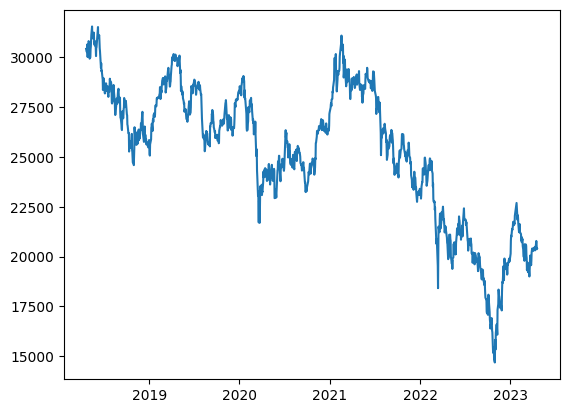

In [ ]:
plt.plot(HSI['date'], HSI['Close'])

In [ ]:
HSI.to_csv('HSI.csv')

# Combination

In [ ]:
HSI['gap'] = HSI['Close'].diff()

In [ ]:
HSI.loc[HSI['gap'] >= 0,'gap'] = 1
HSI.loc[HSI['gap'] < 0,'gap'] = 0

In [ ]:
#import pandas as pd
#df = pd.read_csv('/content/ganggu_final.csv')
#df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_merge = pd.merge(df, HSI, on='date')

In [ ]:
df_merge.corr()

<ipython-input-27-4d19dbde0e81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()


,Unnamed: 0,text_score,emotion_score,total_score,Open,High,Low,Close,Adj Close,Volume,gap
Unnamed: 0,1.000000,-0.055131,-0.008634,-0.040417,0.680604,0.700809,0.686744,0.666372,0.666372,-0.268621,-0.387553
text_score,-0.055131,1.000000,0.032554,0.637478,0.001269,0.006938,0.012115,0.017909,0.017909,0.028220,0.127013
emotion_score,-0.008634,0.032554,1.000000,0.790812,0.004782,0.001561,0.006910,0.003977,0.003977,-0.014649,-0.003215
total_score,-0.040417,0.637478,0.790812,1.000000,0.004463,0.005452,0.012746,0.014033,0.014033,0.005989,0.075302
Open,0.680604,0.001269,0.004782,0.004463,1.000000,0.979948,0.984910,0.952239,0.952239,-0.193597,-0.218280
High,0.700809,0.006938,0.001561,0.005452,0.979948,1.000000,0.985323,0.983563,0.983563,-0.187976,-0.132937
Low,0.686744,0.012115,0.006910,0.012746,0.984910,0.985323,1.000000,0.978695,0.978695,-0.267412,-0.139583
Close,0.666372,0.017909,0.003977,0.014033,0.952239,0.983563,0.978695,1.000000,1.000000,-0.237114,-0.037125
Adj Close,0.666372,0.017909,0.003977,0.014033,0.952239,0.983563,0.978695,1.000000,1.000000,-0.237114,-0.037125
Volume,-0.268621,0.028220,-0.014649,0.005989,-0.193597,-0.187976,-0.267412,-0.237114,-0.237114,1.000000,0.124274


In [ ]:
df_merge.to_csv('ganggu_score.csv')

In [ ]:
def merge_time(df,key_word='date', news_amounts = 'news_amount', text_score_name="text_score",image_score_name="emotion_score",total_score_name="total_score"):
    time_unique=np.unique(df[key_word])
    df_time = pd.DataFrame(columns=[key_word,text_score_name, image_score_name,total_score_name,"gap", 'Volume'])
    print(time_unique)
    for time_get in time_unique:
        df_get_this_time_data=df[df[key_word]==time_get]
        news_amount = len(df_get_this_time_data[text_score_name])
        # print(df_get_this_time_data)
        text_score=np.mean(df_get_this_time_data[text_score_name].values)#Or, text_score=np.mean(df_get_this_time_data["text_score"].values)
        image_score=np.mean(df_get_this_time_data[image_score_name].values) # Or,  image_score=np.mean(df_get_this_time_data["image_score"].values)
        total_score=np.mean(df_get_this_time_data[total_score_name].values)
        print(total_score)
        # image_score=np.mean(df_get_this_time_data["image_score"])
        df_time=df_time._append({key_word:time_get, news_amounts: news_amount, text_score_name: text_score, image_score_name: image_score,total_score_name: total_score,"gap":df_get_this_time_data["gap"].values[0], 'Volume':df_get_this_time_data["Volume"].values[0] }, ignore_index=True)

    # panda_frame_file.set_index("time", drop=False)
    return df_time

In [ ]:
import numpy as np

In [ ]:
df_final = merge_time(df_merge)

['2023-01-30T00:00:00.000000000' '2023-01-31T00:00:00.000000000'
 '2023-02-01T00:00:00.000000000' '2023-02-02T00:00:00.000000000'
 '2023-02-03T00:00:00.000000000' '2023-02-06T00:00:00.000000000'
 '2023-02-07T00:00:00.000000000' '2023-02-08T00:00:00.000000000'
 '2023-02-09T00:00:00.000000000' '2023-02-10T00:00:00.000000000'
 '2023-02-13T00:00:00.000000000' '2023-02-14T00:00:00.000000000'
 '2023-02-15T00:00:00.000000000' '2023-02-16T00:00:00.000000000'
 '2023-02-17T00:00:00.000000000' '2023-02-20T00:00:00.000000000'
 '2023-02-21T00:00:00.000000000' '2023-02-22T00:00:00.000000000'
 '2023-02-23T00:00:00.000000000' '2023-02-24T00:00:00.000000000'
 '2023-02-27T00:00:00.000000000' '2023-02-28T00:00:00.000000000'
 '2023-03-01T00:00:00.000000000' '2023-03-02T00:00:00.000000000'
 '2023-03-03T00:00:00.000000000' '2023-03-06T00:00:00.000000000'
 '2023-03-07T00:00:00.000000000' '2023-03-08T00:00:00.000000000'
 '2023-03-09T00:00:00.000000000' '2023-03-10T00:00:00.000000000'
 '2023-03-13T00:00:00.000

In [ ]:
df_final

,date,text_score,emotion_score,total_score,gap,Volume,news_amount
0,2023-01-30,0.500000,0.500000,1.000000,0.0,3802780400,28.0
1,2023-01-31,0.857143,0.015873,0.873016,0.0,3304372200,63.0
2,2023-02-01,1.083333,-0.187500,0.895833,1.0,2548571000,48.0
3,2023-02-02,0.833333,0.125000,0.958333,0.0,2401245600,48.0
4,2023-02-03,0.666667,0.125000,0.791667,0.0,2414664700,48.0
5,2023-02-06,0.595745,0.148936,0.744681,0.0,2314469800,47.0
6,2023-02-07,1.107143,0.553571,1.660714,1.0,1777942000,56.0
7,2023-02-08,0.857143,0.265306,1.122449,0.0,1894498900,49.0
8,2023-02-09,0.961538,0.038462,1.000000,1.0,1933829700,52.0
9,2023-02-10,0.576923,0.192308,0.769231,0.0,1782692000,52.0


In [ ]:
df_final['Volume'] = df_final['Volume'].astype(str).astype(float)

In [ ]:
df_final.corr()

<ipython-input-72-dcfd88b6da59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,text_score,emotion_score,total_score,gap,Volume,news_amount
text_score,1.000000,-0.061044,0.772755,0.601783,0.075176,0.429953
emotion_score,-0.061044,1.000000,0.586348,-0.067396,-0.082396,-0.038240
total_score,0.772755,0.586348,1.000000,0.445534,0.008616,0.324622
gap,0.601783,-0.067396,0.445534,1.000000,0.090325,0.201933
Volume,0.075176,-0.082396,0.008616,0.090325,1.000000,-0.067538
news_amount,0.429953,-0.038240,0.324622,0.201933,-0.067538,1.000000


In [ ]:
df_final.to_csv('ganggu_final.csv')

In [ ]:
df_correlation = df_final.corr()

<ipython-input-74-c53117377db6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df_final.corr()


In [ ]:
df_correlation.to_csv('ganggu_correlation.csv')

# Data Visualization

## Heatmap

In [ ]:
import seaborn as sns

<Axes: >

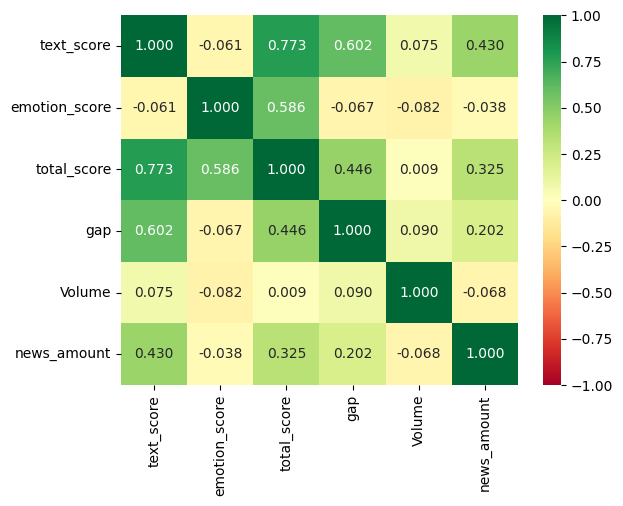

In [ ]:
sns.heatmap(data=df_correlation,annot=True,fmt=".3f",vmin=-1, vmax=1, cmap='RdYlGn') 

## Time Series

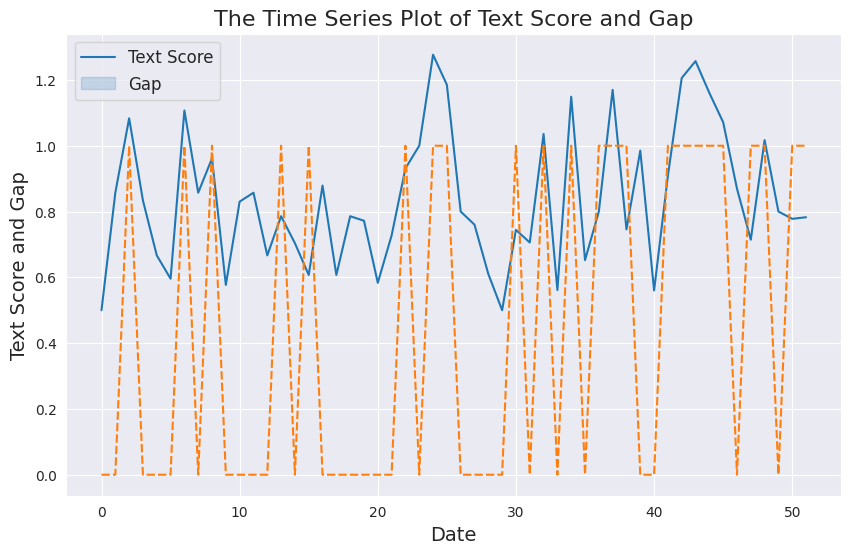

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style('darkgrid')

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_final[['text_score', 'gap']], ax=ax)

# Add x and y axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Text Score and Gap', fontsize=14)

# Add a title to the plot
ax.set_title('The Time Series Plot of Text Score and Gap', fontsize=16)

# Customize the legend
ax.legend(labels=['Text Score', 'Gap'], fontsize=12)

# Display the plot
plt.show()

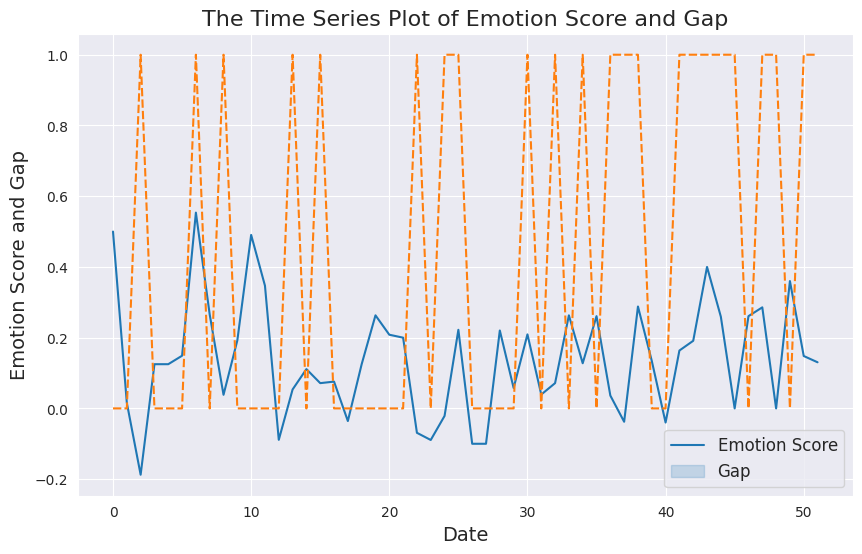

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style('darkgrid')

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_final[['emotion_score', 'gap']], ax=ax)

# Add x and y axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Emotion Score and Gap', fontsize=14)

# Add a title to the plot
ax.set_title('The Time Series Plot of Emotion Score and Gap', fontsize=16)

# Customize the legend
ax.legend(labels=['Emotion Score', 'Gap'], fontsize=12)

# Display the plot
plt.show()

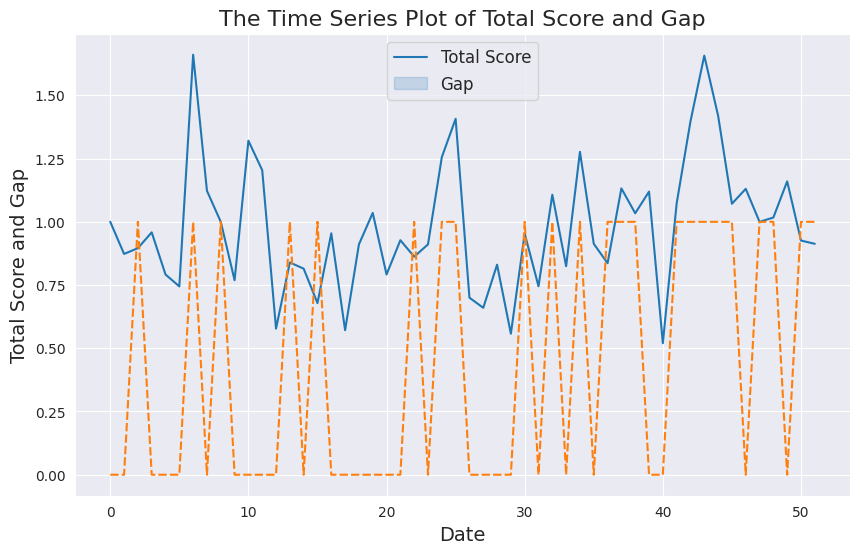

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style('darkgrid')

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_final[['total_score', 'gap']], ax=ax)

# Add x and y axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Total Score and Gap', fontsize=14)

# Add a title to the plot
ax.set_title('The Time Series Plot of Total Score and Gap', fontsize=16)

# Customize the legend
ax.legend(labels=['Total Score', 'Gap'], fontsize=12)

# Display the plot
plt.show()

# Logistic Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm

# load the data
data = pd.read_csv('/content/ganggu_final.csv')

# define the independent and dependent variables
X = data['text_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.475601
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                   52
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.3072
Time:                        18:45:38   Log-Likelihood:                -24.731
converged:                       True   LL-Null:                       -35.697
Covariance Type:            nonrobust   LLR p-value:                 2.826e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2555      1.989     -3.648      0.000     -11.154      -3.357
text_score     8.3509      2.

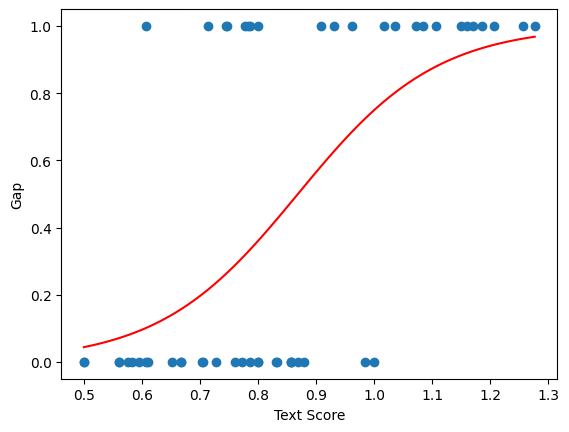

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values for the independent variable
x = np.linspace(data['text_score'].min(), data['text_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['text_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['text_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Text Score')
plt.ylabel('Gap')
plt.show()

In [ ]:
# define the independent and dependent variables
X = data['emotion_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.684195
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                   52
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                0.003323
Time:                        18:46:37   Log-Likelihood:                -35.578
converged:                       True   LL-Null:                       -35.697
Covariance Type:            nonrobust   LLR p-value:                    0.6262
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1145      0.368     -0.311      0.756      -0.836       0.607
emotion_score    -0.

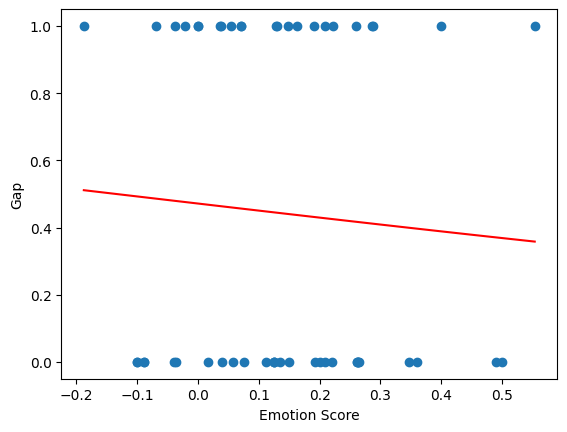

In [ ]:
# Create a range of values for the independent variable
x = np.linspace(data['emotion_score'].min(), data['emotion_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['emotion_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['emotion_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Emotion Score')
plt.ylabel('Gap')
plt.show()

In [ ]:
# define the independent and dependent variables
X = data['total_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.576182
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                   52
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.1607
Time:                        19:21:53   Log-Likelihood:                -29.961
converged:                       True   LL-Null:                       -35.697
Covariance Type:            nonrobust   LLR p-value:                 0.0007071
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.6079      1.563     -2.949      0.003      -7.671      -1.545
total_score     4.4626    

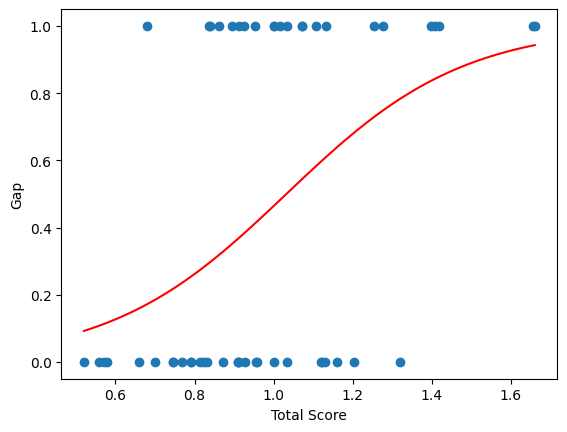

In [ ]:
# Create a range of values for the independent variable
x = np.linspace(data['total_score'].min(), data['total_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['total_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['total_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Total Score')
plt.ylabel('Gap')
plt.show()

#Linear Regression

In [4]:
import pandas as pd
import statsmodels.api as sm

In [5]:
# load the data
data = pd.read_csv('/content/ganggu_final.csv')

# Select the two variables to test
X = data['news_amount']
y = data['Volume']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2291
Date:                Sat, 22 Apr 2023   Prob (F-statistic):              0.634
Time:                        06:41:27   Log-Likelihood:                -1124.4
No. Observations:                  52   AIC:                             2253.
Df Residuals:                      50   BIC:                             2257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.717e+09   5.67e+08      4.791      

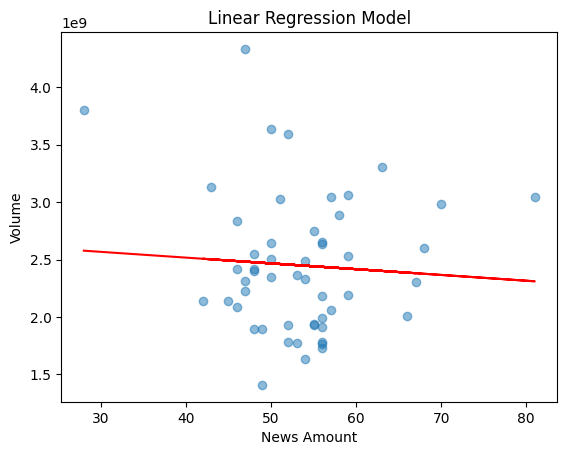

In [6]:
import matplotlib.pyplot as plt

# Visualize the data and the regression line
plt.scatter(X['news_amount'], y, alpha=0.5)
plt.plot(X['news_amount'], model.predict(X), color='red')

# Add labels and title to the plot
plt.xlabel('News Amount')
plt.ylabel('Volume')
plt.title('Linear Regression Model')

# Show the plot
plt.show()